<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/Mountain-Car-Gym-Q-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mountain Car - OpenIA Gym
---
## Description
- The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill. There are two versions of the mountain car domain in gym: one with discrete actions and one with continuous. This version is the one with discrete actions.
---
## Observation Space
- The observation is a `ndarray` with shape `(2,)` where the elements correspond to the following:

 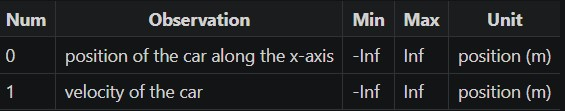

##Action Space
- There are 3 discrete deterministic actions:
  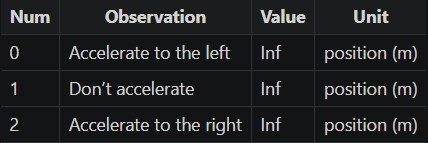
---
# Transition Dynamics:
### Given an action, the mountain car follows the following transition dynamics:

- velocityt+1 = velocityt + (action - 1) * force - cos(3 * positiont) * gravity

- positiont+1 = positiont + velocityt+1

- where force = 0.001 and gravity = 0.0025. The collisions at either end are inelastic with the velocity set to 0 upon collision with the wall. The position is clipped to the range `[-1.2, 0.6]` and velocity is clipped to the range `[-0.07, 0.07]`.
---
# Reward:
The goal is to reach the flag placed on top of the right hill as quickly as possible, as such the agent is penalised with a reward of -1 for each timestep.
---
# Gym Documentation
[Link](https://www.gymlibrary.dev/environments/classic_control/mountain_car/)
---
# Aprendizado por reforco usando Q-Learning
---
## Conceitos basicos
- Aprendizado por Reforço: É um tipo de aprendizado de máquina onde um agente aprende a tomar decisões em um ambiente, interagindo continuamente com ele. O agente recebe recompensas por suas ações e aprende ações que maximizam a recompensa ao longo do tempo.

- Tabela Q (Q-table): No Q-learning, o agente mantém uma tabela (ou matriz) chamada Tabela Q, onde cada entrada Q[s, a] representa o valor esperado de obter uma recompensa ao realizar a ação 'a' em um estado 's'. O objetivo do agente é aprender a tabela Q que maximiza as recompensas cumulativas.
---
## Notebook
- Notebook com uma solucao simples do projeto do Mountain car do ambiente da gym da Open IA
- Projeto com o objetivo de estudos e desenolvimento de aprendizado
---
#Contato
- **LinkedIn** : [Henrique Baptista](https://www.linkedin.com/in/henrique-baptista777/)
- **GitHub** : [henriquebap](https://github.com/henriquebap)
- **Email** : [henriquebaptista2003@gmail.com](mailto:henriquebaptista2003@gmail.com)

In [1]:
!pip install gym
!apt-get install -y xvfb python-opengl ffmpeg
!pip install imageio[ffmpeg] pyvirtualdisplay

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make('MountainCar-v0')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
# Configurações do algoritmo Q-learning
alpha = 0.5  # taxa de aprendizado
gamma = 0.70  # fator de desconto
epsilon = 0.5  # taxa de exploração

# Discretização do espaço de estados
num_bins = 20
bins = [np.linspace(-1.2, 0.6, num_bins), np.linspace(-0.07, 0.07, num_bins)]

# Inicialização da tabela Q com zeros
Q = np.zeros((num_bins, num_bins, env.action_space.n))

def discretize(state, bins):
    return tuple(np.digitize(s, b) - 1 for s, b in zip(state, bins))

In [5]:
def train_agent(env, Q, alpha, gamma, epsilon, bins, num_episodes=10000):
    for episode in range(num_episodes):
        state = env.reset()
        state = discretize(state, bins)

        done = False
        while not done:
            if np.random.random() < epsilon:
                action = env.action_space.sample()  # Exploração
            else:
                action = np.argmax(Q[state])  # Exploração

            next_state, reward, done, _ = env.step(action)
            next_state = discretize(next_state, bins)

            Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
            state = next_state

        if episode % 1000 == 0:
            print(f"Episode {episode} completed")

In [6]:
train_agent(env, Q, alpha, gamma, epsilon, bins)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0 completed
Episode 1000 completed
Episode 2000 completed
Episode 3000 completed
Episode 4000 completed
Episode 5000 completed
Episode 6000 completed
Episode 7000 completed
Episode 8000 completed
Episode 9000 completed


In [7]:
def evaluate_agent(env, Q, bins, render=False):
    state = env.reset()
    state = discretize(state, bins)
    total_reward = 0
    done = False
    while not done:
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        state = discretize(state, bins)
        total_reward += reward
        if render:
            env.render()
    return total_reward

# Avaliação do agente
reward = evaluate_agent(env, Q, bins, render=True)
print(f"Total Reward: {reward}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Total Reward: -200.0


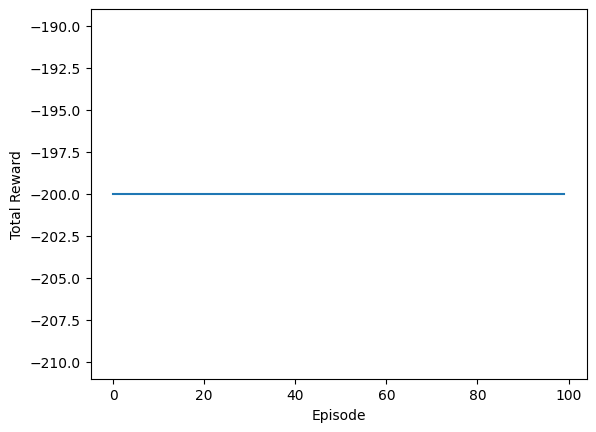

In [8]:
rewards = [evaluate_agent(env, Q, bins) for _ in range(100)]
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

In [9]:
env.close()